<a href="https://colab.research.google.com/github/kdotmanoj/AeroFit/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>About aerofit</h1>**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.
**<h1>Business Problem</h1>**
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.



**<h1>Importing Libraries</h1>**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**<h1>Importing Dataset</h1>**

In [68]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
!gdown $url

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 31.2MB/s]


In [69]:
df = pd.read_csv('/content/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**<h1>Basic Data Analysis</h1>**

<h2>Displaying first five rows of Dataframe

In [70]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<h2>Shape of the data</h3>

In [71]:
df.shape

(180, 9)



*   Number of rows = 180
*   Number of columns = 9



<h2>Data types of all attributes

In [72]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object



*   Except product,Gender & MaritalStatus all are numerical values




**<h2>Statistical Summary**

In [73]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**<h1> Non-Graphical Analysis**

**<h2>Products</h2>**
<h3>Unique Products

In [74]:
df['Product'].nunique()

3

In [75]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)



*   Inference : Aerofit produces 3 unique products which are KP281, KP481, KP781



<h3>Value Counts

In [76]:
Product_count = df['Product'].value_counts(normalize = True)*100
Product_count.round(2)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

**Inference :**

*   44.44% people prefer treadmill model KP281
*   33.33% people prefer treadmill model KP481
*   22.22% people prefer treadmill model KP781



**<h2>Age</h2>**
<h3>Different ages

In [77]:
df['Age'].nunique()

32

In [78]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])



*   There are people of 32 different ages who buy the treadmills



<h3>Value Counts

In [79]:
age_count = df['Age'].value_counts(normalize = True)*100
age_count.round(2)

Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: proportion, dtype: float64

In [80]:
age_count[(age_count.index >= 20)&(age_count.index <= 30)].sum().round(2)

63.89



*   The treadmills are most famous among people aged 25
*   Majority of buyers belong to the age ground of 20-30 as they constitute 63.89% of the total buyers



**<h2>Gender**
<h3>Unique genders

In [81]:
df['Gender'].nunique()

2

In [82]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)



*   There are two unique genders of buyers which are male and female



<h3> Value Count

In [83]:
age_count = df['Gender'].value_counts(normalize = True)*100
age_count.round(2)

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64



*   Aerofit treadmills are equally famous between both genders with 57.78% male buyers and 42.22% female buyers



**<h2>Marital Status**
<h3>Unique

In [84]:
df['MaritalStatus'].nunique()

2

In [85]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)



*   There are two unique types buyers with marital status single & partnered



<h3>Value Count

In [86]:
age_count = df['MaritalStatus'].value_counts(normalize = True)*100
age_count.round(2)

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64



*   Almost 60% of buyers are partnered and the rest 40% are single



**<h1>Visual Analysis(Univariate)**
**<h2>Catergorical Analysis</h2>**
<h2>Distribution of tredmills among users

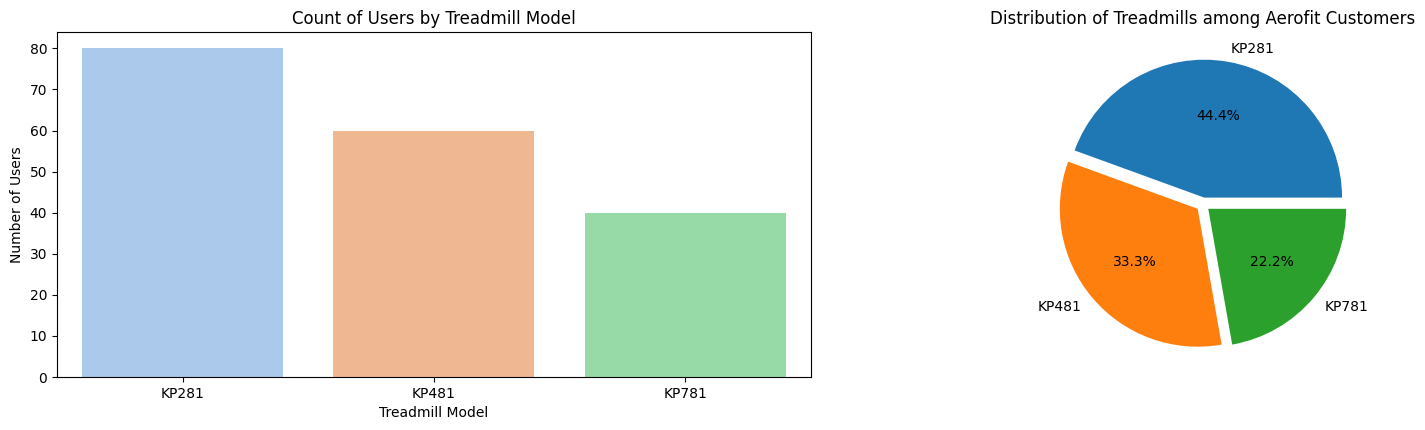

In [87]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
sns.countplot(data=df, x='Product', hue='Product', palette='pastel', legend=False)
plt.xlabel('Treadmill Model')
plt.ylabel('Number of Users')
plt.title('Count of Users by Treadmill Model')

plt.subplot(222)
sizes = df['Product'].value_counts()
labels = df['Product'].unique()
explode = (0.05,) * len(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Distribution of Treadmills among Aerofit Customers')

plt.tight_layout()
plt.show()


Insights and Recommendations:

1. The KP281 treadmill is preferred by 44.44% of users, making it the top choice due to its affordability and suitability for beginners.
   - Recommendation: Highlight the budget-friendly nature and beginner-friendly features of the KP281 to attract more customers.

2. The KP481 treadmill is favored by 33.33% of customers, appreciated for its ideal fit for mid-level runners and value-for-money offering.
   - Recommendation: Focus marketing efforts on reaching mid-level runners and emphasize the KP481's tailored features for their specific fitness needs.

3. Only 22.22% of users opt for the KP781 treadmill, which boasts advanced capabilities and higher pricing.
   - Recommendation: Launch targeted marketing campaigns to increase awareness and interest in the KP781 among potential customers who value advanced functionalities.

By strategically highlighting the unique features and benefits of each treadmill model, Aerofit can effectively cater to the diverse preferences and needs of its customers, ultimately driving sales and customer satisfaction.

**<h2>Distribution of users based on gender**

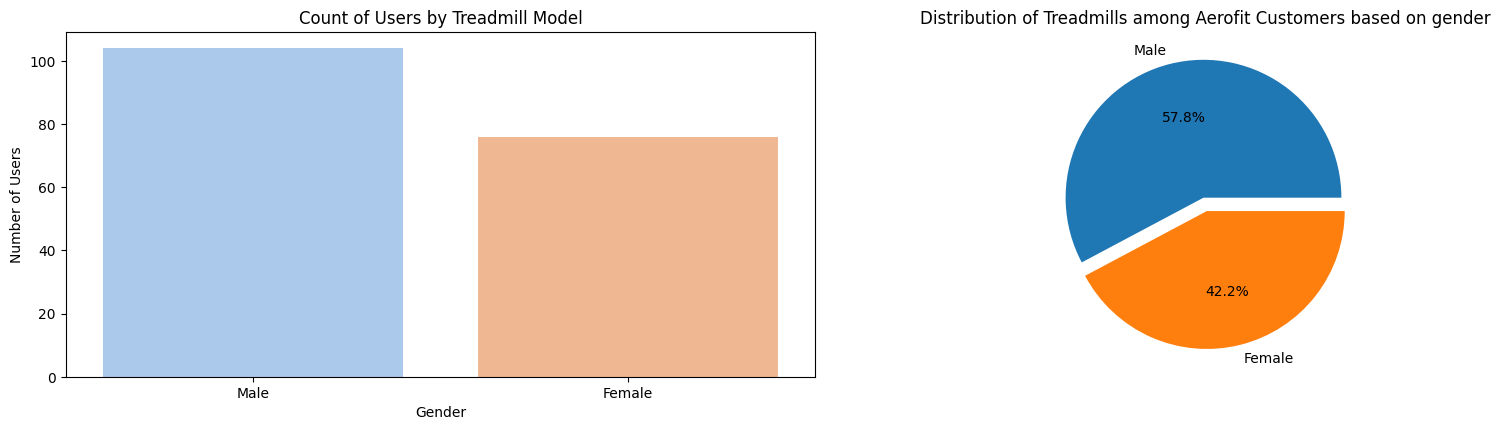

In [88]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.ylabel('Number of Users')
plt.title('Count of Users by Treadmill Model')

plt.subplot(222)
sizes = df['Gender'].value_counts()
labels = df['Gender'].unique()
explode = (0.05,) * len(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Distribution of Treadmills among Aerofit Customers based on gender')

plt.tight_layout()
plt.show()


Insight:
Aerofit has a diverse customer base, with approximately 57.78% being male and 42.22% being female. This indicates a balanced representation of genders among Aerofit's clientele.

Recommendations:
1. Tailor marketing campaigns to resonate with the unique needs and aspirations of female customers. Highlight the empowerment and wellness benefits of fitness in advertising materials.
2. Emphasize the inclusive and versatile features of Aerofit treadmills to attract a broader audience, showcasing how the products cater to diverse fitness goals and lifestyles.
3. Expand the range of treadmill models offered, ensuring there are options suitable for all fitness levels and preferences. This ensures Aerofit remains competitive and appeals to a wide spectrum of customers.

**<h2>Distribution of users based on Marital status**

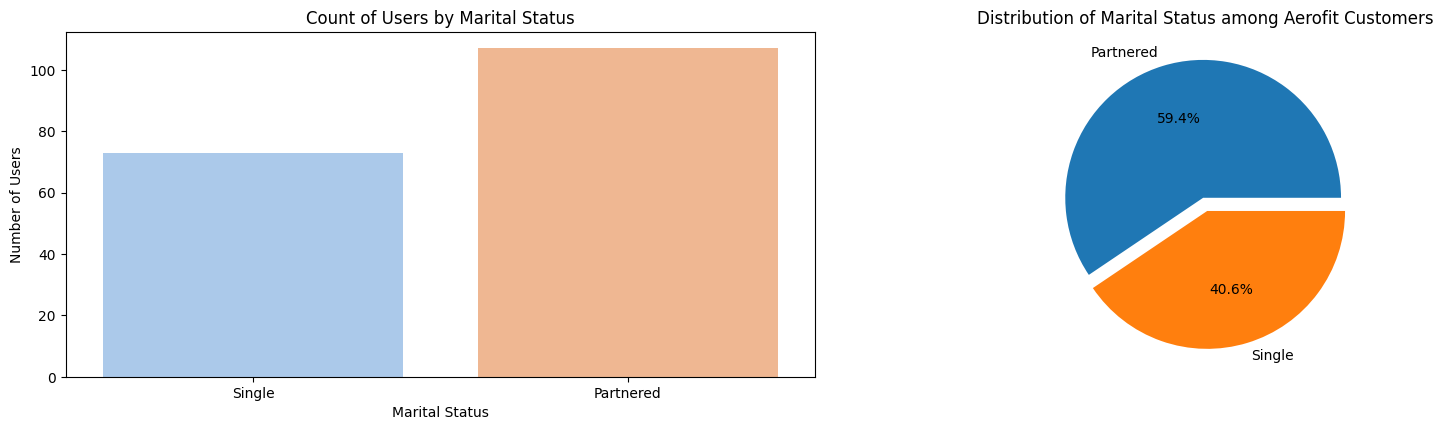

In [89]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
sns.countplot(data=df, x='MaritalStatus', palette='pastel', hue='MaritalStatus', legend=False)
plt.xlabel('Marital Status')
plt.ylabel('Number of Users')
plt.title('Count of Users by Marital Status')

plt.subplot(222)
sizes = df['MaritalStatus'].value_counts()
labels = df['MaritalStatus'].unique()
labels = ['Partnered' if label == 'Single' else 'Single' for label in labels]
explode = (0.05,) * len(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Distribution of Marital Status among Aerofit Customers')

plt.tight_layout()
plt.show()


Insight:
Approximately 59.4% of Aerofit customers are partnered, while the remaining customers are single.

The majority of Aerofit customers are in committed relationships, indicating a potential focus on family-oriented marketing strategies.

Recommendations:
1. Develop marketing campaigns that highlight the benefits of fitness for couples or families, emphasizing the idea of staying healthy together.
2. Offer package deals or promotions that cater to both partners, encouraging them to join Aerofit together and enjoy the benefits of a healthy lifestyle as a unit.

**<h2>Distribution of users based on Age group**

Adding new coloumn Age group to get relevant insights

In [90]:
df['Age group'] = pd.cut(df['Age'],bins=[17,29,39,50],labels=['Young','Middle-Aged','Old'])
df['Age group'].value_counts()

Age group
Young          113
Middle-Aged     50
Old             17
Name: count, dtype: int64

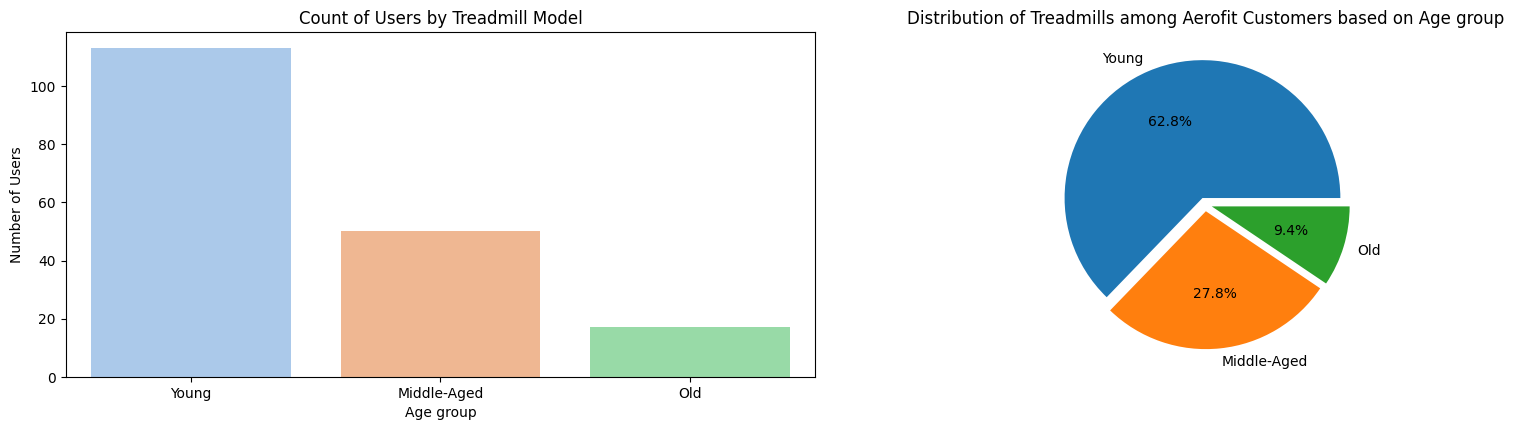

In [91]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
sns.countplot(data=df, x='Age group', hue='Age group', palette='pastel', legend=False)
plt.ylabel('Number of Users')
plt.title('Count of Users by Treadmill Model')

plt.subplot(222)
sizes = df['Age group'].value_counts()
labels = df['Age group'].unique()
explode = (0.05,) * len(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Distribution of Treadmills among Aerofit Customers based on Age group')

plt.tight_layout()
plt.show()


Insight:
1. Majority of users are young(18-29) i.e 62.8%
2. 27.8% of the users are Middle-aged(30-39)
3. Only 9.4% old users buy Aerofit tredmills(40-50)

Redommendations:


*   Considering popularity among youngsters new offers should be launched targeting young audience.
*   Awareness should be spread about importance of health among older customers to increase sales




**<h2>Distribution of users based on Income levels**

Adding new coloumn Income level to get relevant insights

In [92]:
df['Income level'] = pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low income','Medium income','High income'])
df['Income level'].value_counts()

Income level
Low income       83
Medium income    76
High income      21
Name: count, dtype: int64

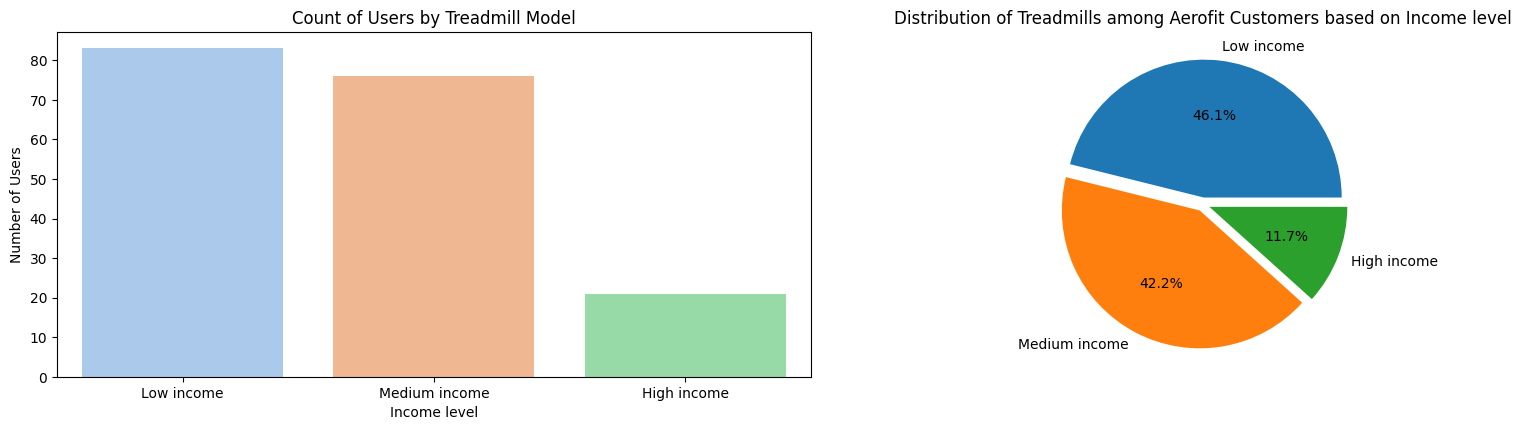

In [93]:
plt.figure(figsize=(16, 8))

plt.subplot(221)
sns.countplot(data=df, x='Income level', hue='Income level', palette='pastel', legend=False)
plt.ylabel('Number of Users')
plt.title('Count of Users by Treadmill Model')

plt.subplot(222)
sizes = df['Income level'].value_counts()
labels = df['Income level'].unique()
explode = (0.05,) * len(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Distribution of Treadmills among Aerofit Customers based on Income level')

plt.tight_layout()
plt.show()


Insights:
• 46.1% of the users falls under the category2 ,i.e, mid income customers.
• 11.7% them are high incomed and remaning 42.2% of them are low incomed customers.
Recommendation : - Showcase the advanced features and premium quality of KP781 treadmill,
catering to the discerning needs of high-income customers. - Highlight how the KP781 enhances
their fitness experience with edge-cutting technology and superioir performance.

<h2>Missing values

In [94]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age group        0
Income level     0
dtype: int64



*   Indicates that there are no null values in the dataframe



**<h2>Handling Outliers**

**<h3>Finding Outliers in Age**

<Axes: xlabel='Age'>

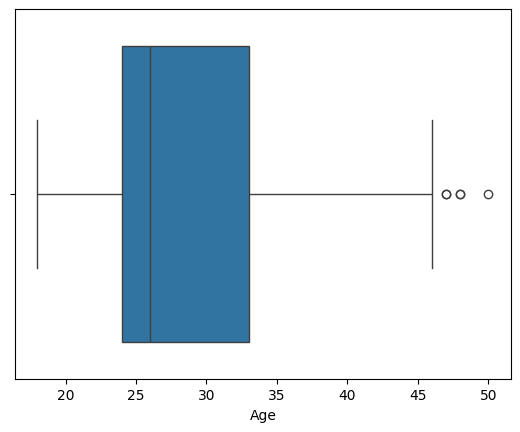

In [95]:
Age = df['Age']
sns.boxplot(x = Age)

In [96]:
Q1 = np.percentile(df['Age'],25)
Q2 = np.percentile(df['Age'],50)
Q3 = np.percentile(df['Age'],75)
IQR = (Q3 - Q1).round(2)
W1 = (Q1 - (1.5 * IQR)).round(2)
W2 = (Q3 + (1.5 * IQR)).round(2)
Q1,Q3,W1, W2,IQR

(24.0, 33.0, 10.5, 46.5, 9.0)

In [97]:
df[(df['Age'] < W1)| (df['Age'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income level
78,KP281,47,Male,16,Partnered,4,3,56850,94,Old,Medium income
79,KP281,50,Female,16,Partnered,3,3,64809,66,Old,Medium income
139,KP481,48,Male,16,Partnered,2,3,57987,64,Old,Medium income
178,KP781,47,Male,18,Partnered,4,5,104581,120,Old,High income
179,KP781,48,Male,18,Partnered,4,5,95508,180,Old,High income


In [98]:
len(df[(df['Age'] < W1)| (df['Age'] > W2 )])

5



*   This indicates that there are five outliers in the age column



**<h3>Finding Outliers in Income**

<Axes: xlabel='Income'>

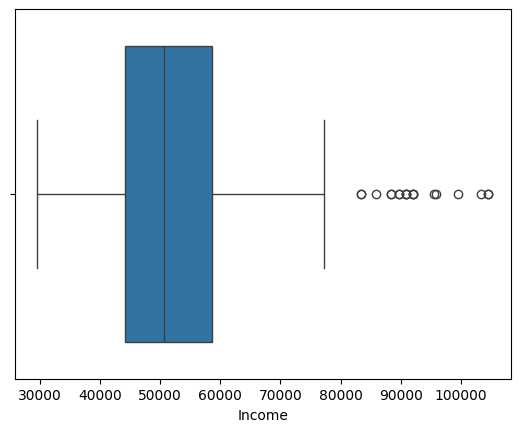

In [99]:
sns.boxplot(x = df['Income'])

In [100]:
Q1 = np.percentile(df['Income'],25)
Q2 = np.percentile(df['Income'],50)
Q3 = np.percentile(df['Income'],75)
IQR = Q3-Q1
W1 = Q1 - 1.5*IQR
W2 = Q2 + 1.5*IQR
Q1,Q2,Q3,W1,W2,IQR

(44058.75, 50596.5, 58668.0, 22144.875, 72510.375, 14609.25)

In [101]:
df[(df['Income'] < W1) | (df['Income'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income level
155,KP781,25,Male,18,Partnered,6,5,75946,240,Young,High income
156,KP781,25,Male,20,Partnered,4,5,74701,170,Young,Medium income
159,KP781,27,Male,16,Partnered,4,5,83416,160,Young,High income
160,KP781,27,Male,18,Single,4,3,88396,100,Young,High income
161,KP781,27,Male,21,Partnered,4,4,90886,100,Young,High income
162,KP781,28,Female,18,Partnered,6,5,92131,180,Young,High income
163,KP781,28,Male,18,Partnered,7,5,77191,180,Young,High income
164,KP781,28,Male,18,Single,6,5,88396,150,Young,High income
166,KP781,29,Male,14,Partnered,7,5,85906,300,Young,High income
167,KP781,30,Female,16,Partnered,6,5,90886,280,Middle-Aged,High income


In [102]:
len(df[(df['Income'] < W1) | (df['Income'] > W2)])

22



*   There are 22 outliers in income column



**<h3>Finding Outliers in Miles**

<Axes: xlabel='Miles'>

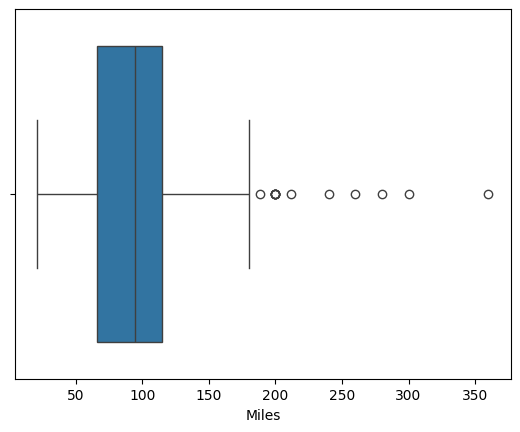

In [103]:
sns.boxplot(x = df['Miles'])

In [104]:
Q1 = np.percentile(df['Miles'],25)
Q2 = np.percentile(df['Miles'],50)
Q3 = np.percentile(df['Miles'],75)
IQR = Q3-Q1
W1 = Q1 - 1.5*IQR
W2 = Q2 + 1.5*IQR
Q1,Q2,Q3,W1,W2,IQR

(66.0, 94.0, 114.75, -7.125, 167.125, 48.75)

In [105]:
df[(df['Miles'] < W1) | (df['Miles'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income level
23,KP281,24,Female,16,Partnered,5,5,44343,188,Young,Low income
61,KP281,34,Male,16,Single,4,5,51165,169,Middle-Aged,Medium income
84,KP481,21,Female,14,Partnered,5,4,34110,212,Young,Low income
103,KP481,25,Male,14,Partnered,4,3,45480,170,Young,Low income
120,KP481,33,Male,13,Partnered,4,4,53439,170,Middle-Aged,Medium income
142,KP781,22,Male,18,Single,4,5,48556,200,Young,Low income
148,KP781,24,Female,16,Single,5,5,52291,200,Young,Medium income
152,KP781,25,Female,18,Partnered,5,5,61006,200,Young,Medium income
154,KP781,25,Male,18,Partnered,6,4,70966,180,Young,Medium income
155,KP781,25,Male,18,Partnered,6,5,75946,240,Young,High income


In [106]:
len(df[(df['Miles'] < W1) | (df['Miles'] > W2)])

23



*   There are 23 outliers in the Miles column



**<h2>Numeric Columns**
<h2>Distribution based on Age

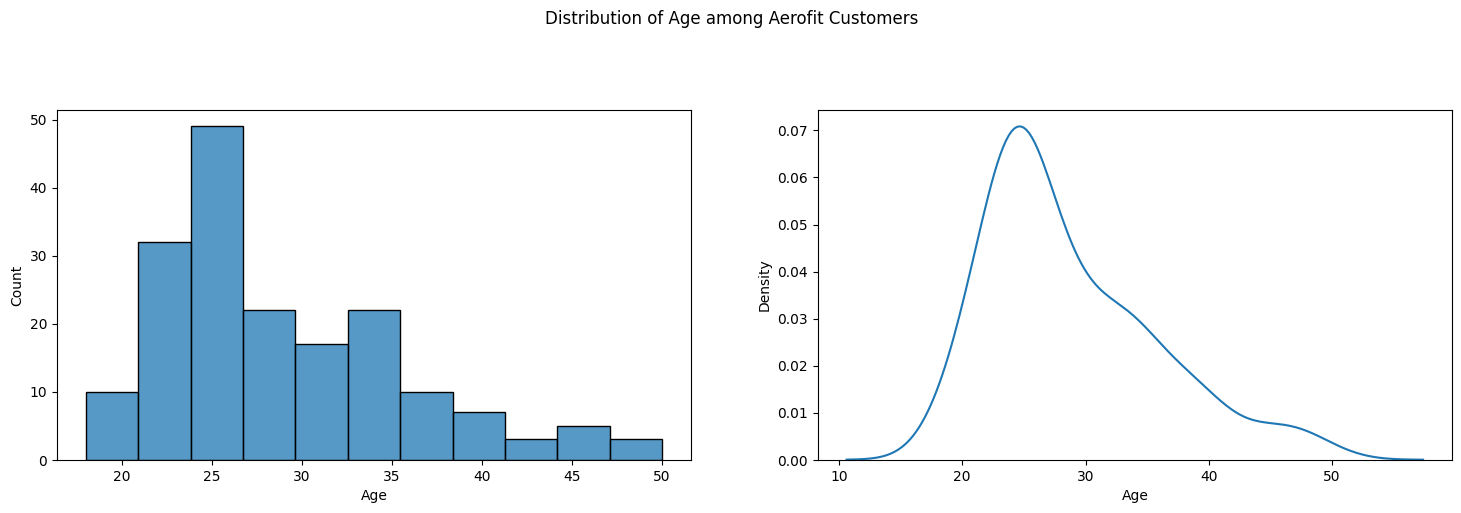

In [107]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Age')
plt.suptitle('Distribution of Age among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Age',legend = True)
plt.show()

Insights:
- A significant portion of Aerofit's customer base falls within the age bracket of 20-40 years, indicating a strong likelihood of purchasing Aerofit treadmills.
- Conversely, there is a notable scarcity of users aged 40-50, with a markedly low probability of purchasing Aerofit treadmills.

<h2>Distribution based on Income

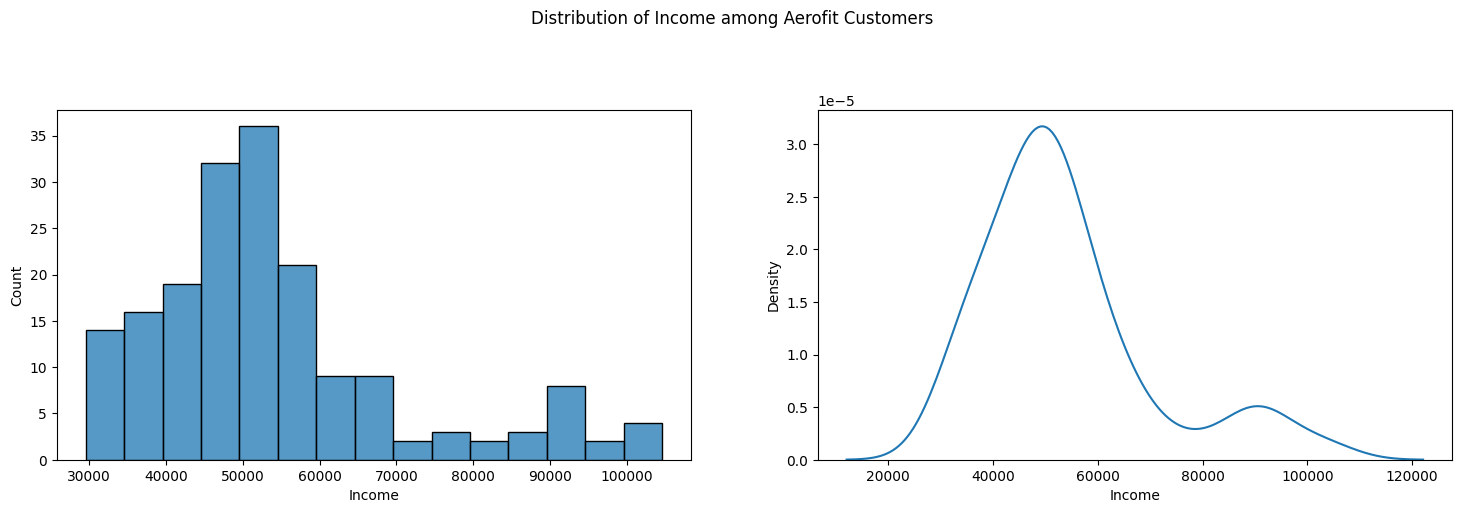

In [108]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Income')
plt.suptitle('Distribution of Income among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Income',legend = True)
plt.show()

Insights:
- The bulk of customers typically earn between 40,000 to 70,000, indicating a strong likelihood of purchasing Aerofit treadmills.
- Customers earning over 80,000 exhibit minimal inclination towards purchasing treadmills.

<h2>Distribution based on Education

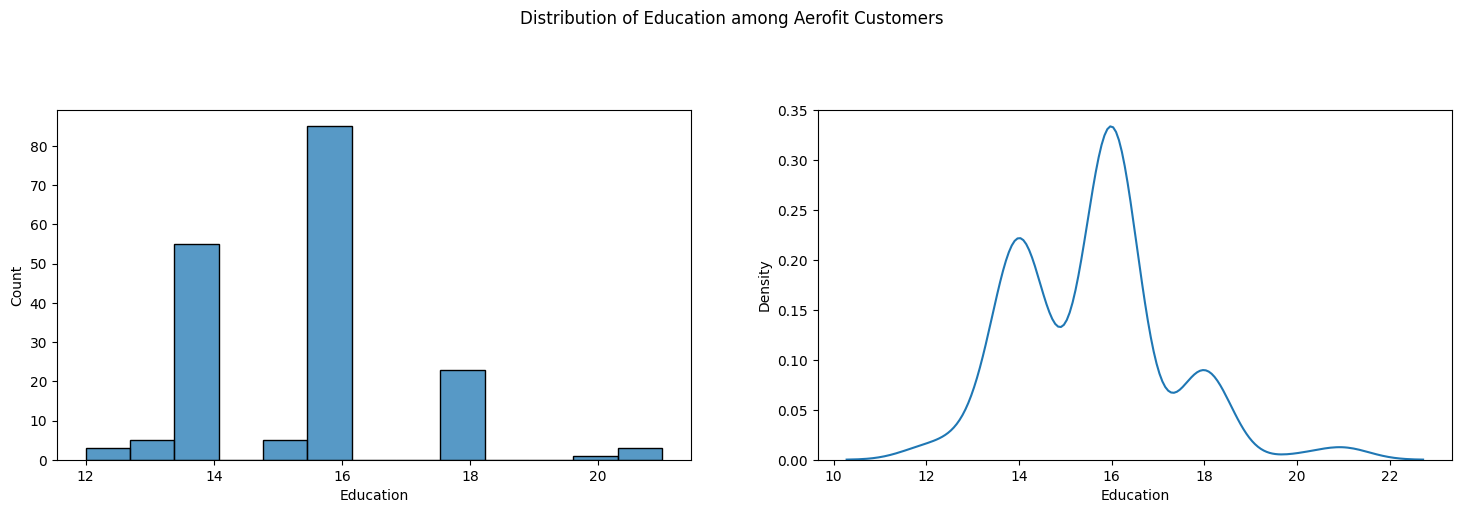

In [109]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Education')
plt.suptitle('Distribution of Education among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Education',legend = True)
plt.show()

Insights:
- The majority of Aerofit treadmill purchases are made by customers with 16 years of education.
- Customers with education levels exceeding 18 years display notably lower tendencies to purchase Aerofit treadmills.

<h2>Distribution based on Fitness level

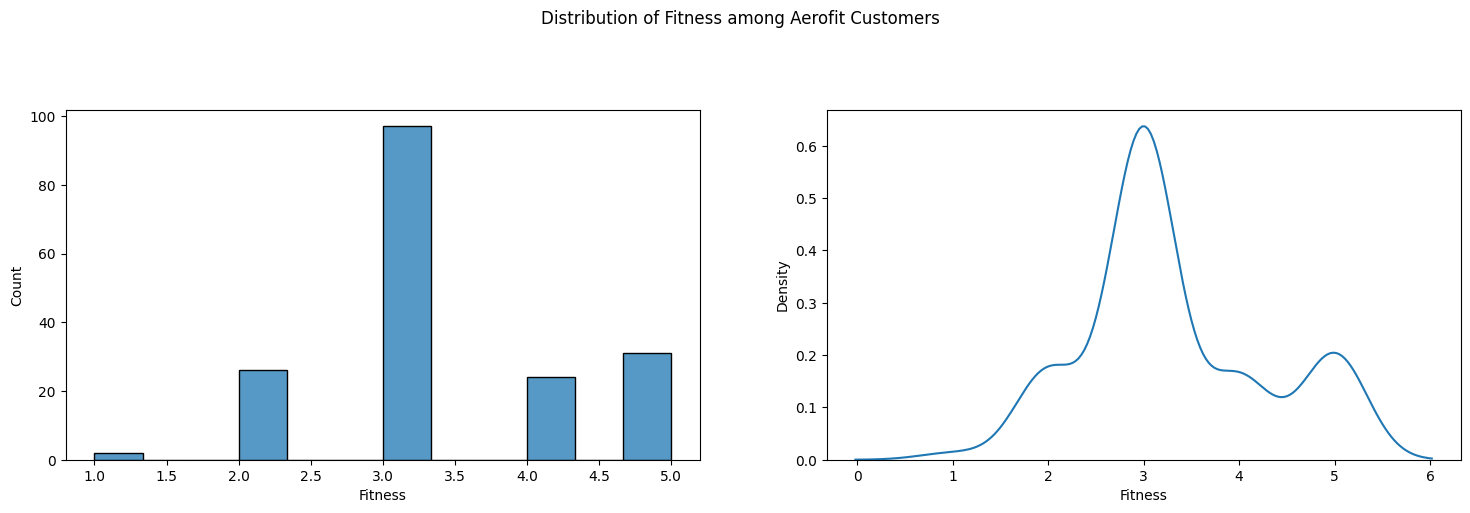

In [110]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Fitness')
plt.suptitle('Distribution of Fitness among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Fitness',legend = True)
plt.show()

Insights : The majority of Aerofit customers possess fitness level 3, which aligns with a high
likelihood of them purchasing treadmills.

<h2>Distribution based on Usage

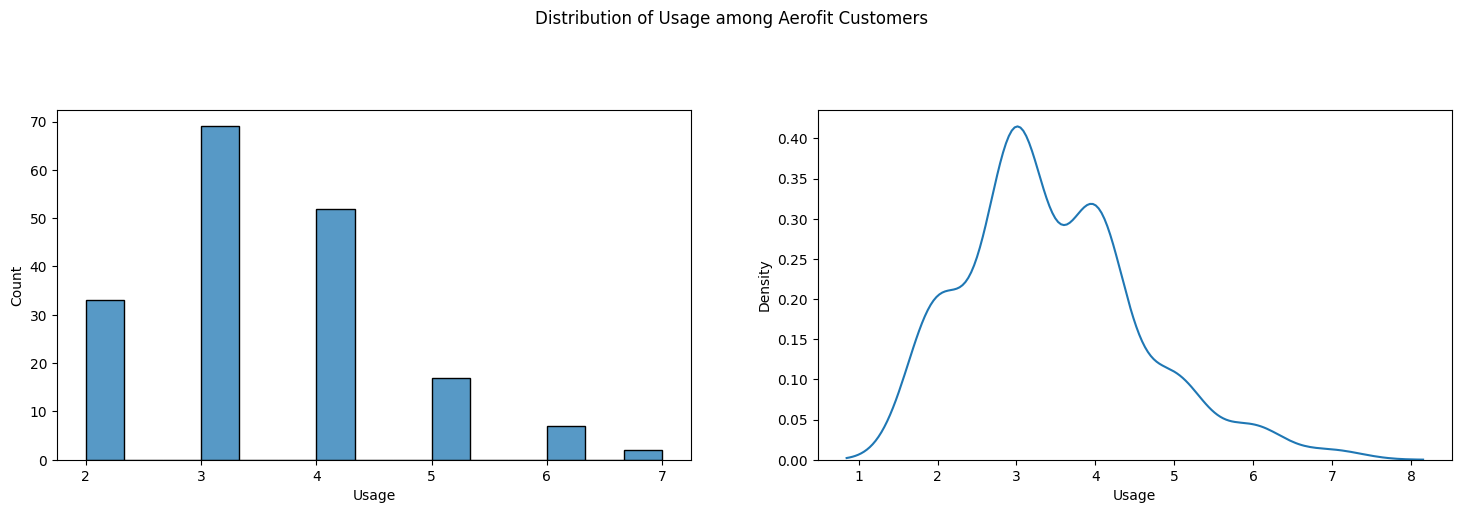

In [111]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Usage')
plt.suptitle('Distribution of Usage among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Usage',legend = True)
plt.show()

Insights :
• The majority of the customers use treadmills 3 times a week, indicating a higher probability
of them purchasing a treadmill from Aerofit.

<h2>Distribution based on Miles

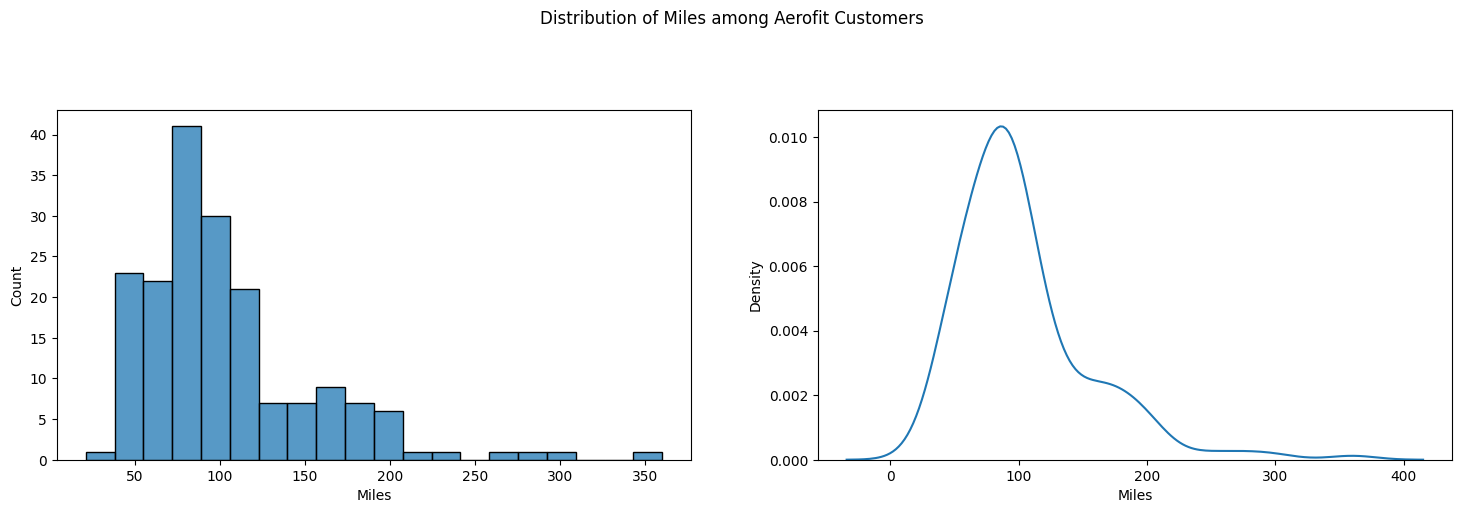

In [112]:
#Histogram plot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.histplot(df,x = 'Miles')
plt.suptitle('Distribution of Miles among Aerofit Customers')

#KDE plot
plt.subplot(222)
sns.kdeplot(df,x = 'Miles',legend = True)
plt.show()

Observations:
- Customers engaging in a weekly mileage range of 90-100 miles exhibit a preference for utilizing Aerofit treadmills.
- Individuals classified as hardcore runners, with an average weekly mileage spanning 200-250 miles, typically favor outdoor jogging over employing Aerofit treadmills.

**<h1>Bivariate Analysis**

**<h2> Distribution of gender across each Treadmill**

<Axes: xlabel='Gender', ylabel='count'>

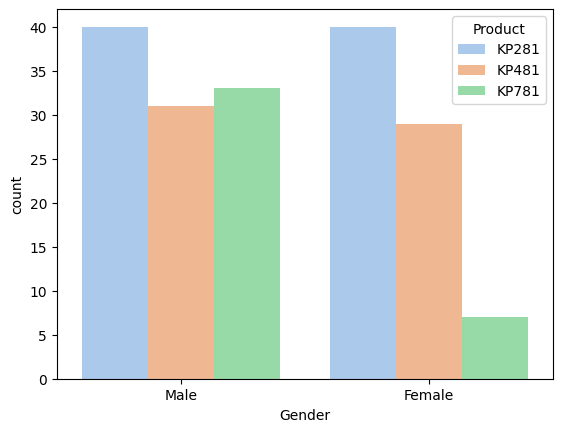

In [113]:
sns.countplot(data=df, x='Gender', hue='Product', palette='pastel')

<Axes: xlabel='Gender', ylabel='count'>

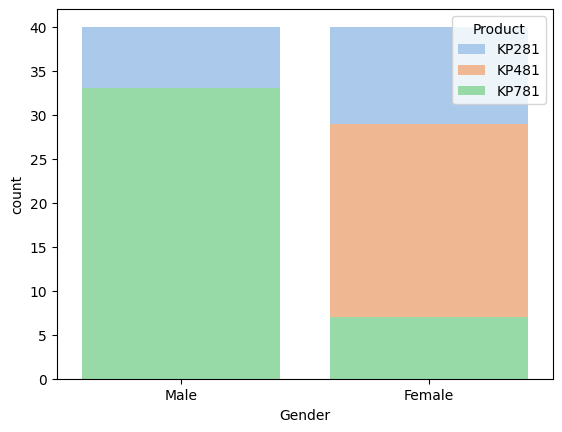

In [114]:
sns.countplot(df,x = 'Gender', hue = 'Product', palette='pastel',dodge = False)

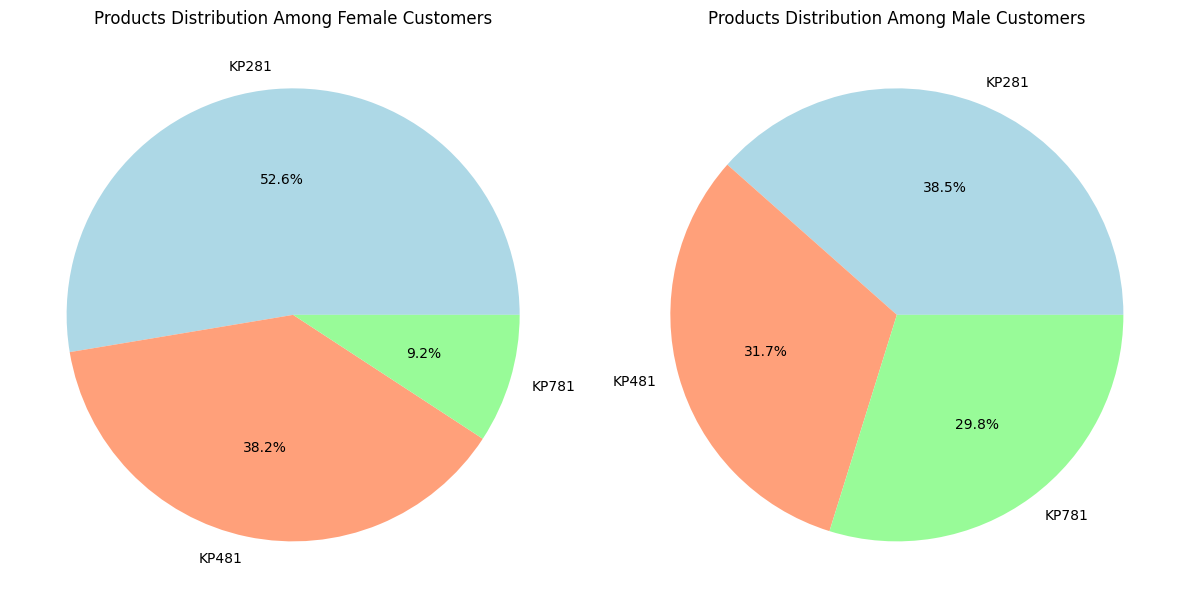

In [115]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']

pastel_palette = ['#ADD8E6', '#FFA07A', '#98FB98']

# Plot for female_df
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(female_df['Product'].value_counts(normalize=True)*100,
        labels=female_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Female Customers')

# Plot for male_df
plt.subplot(1, 2, 2)
plt.pie(male_df['Product'].value_counts(normalize=True)*100,
        labels=male_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Male Customers')

plt.tight_layout()
plt.show()


Insights:
- There is a comparable distribution of products among male and female customers, with KP281 being slightly preferred by both genders.
- Female customers exhibit a slightly higher preference for KP481 compared to male customers.
- KP781 demonstrates a smaller customer base across both genders, indicating a potential need for targeted marketing or product refinement.

Recommendations:
- Implement targeted marketing strategies to emphasize KP481 and KP781 features tailored to the preferences of female customers.
- Utilize customer feedback and reviews to identify and address any potential barriers or misconceptions affecting KP781's customer base.
- Explore the possibility of offering bundled deals or discounts to incentivize customers to upgrade to premium models like KP781.

**<h2> Distribution based on Marital status across each Treadmill**

<Axes: xlabel='MaritalStatus', ylabel='count'>

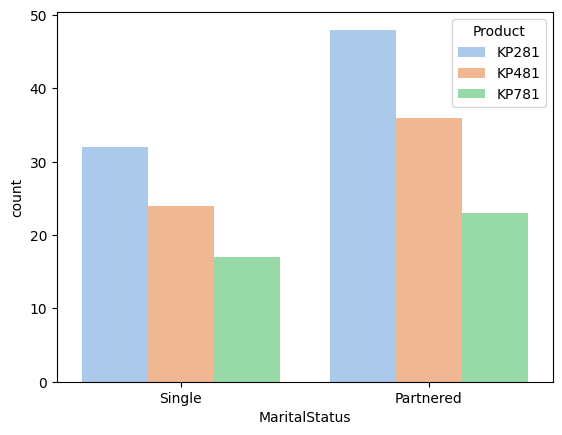

In [116]:
sns.countplot(data=df, x='MaritalStatus', hue='Product', palette='pastel')

<Axes: xlabel='MaritalStatus', ylabel='count'>

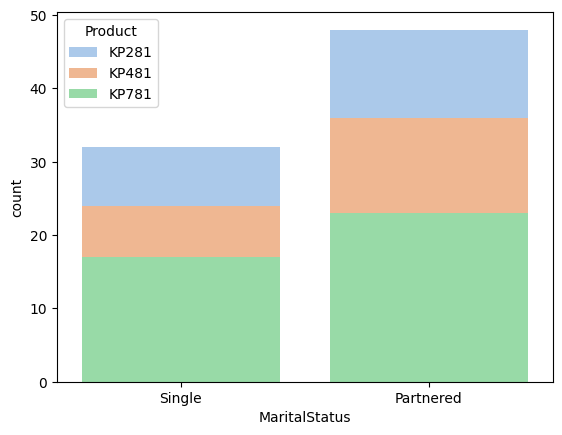

In [117]:
sns.countplot(df,x = 'MaritalStatus', hue = 'Product', palette='pastel',dodge = False)

Insights:
- Married customers exhibit a higher purchasing frequency across all treadmill models compared to single customers.
- The purchasing trend among both married and single customers suggests that KP281, characterized as an entry-level and budget-friendly option, emerges as the most preferred choice. Conversely, KP781, with its higher cost, maintains its position as the least popular option among both customer groups.

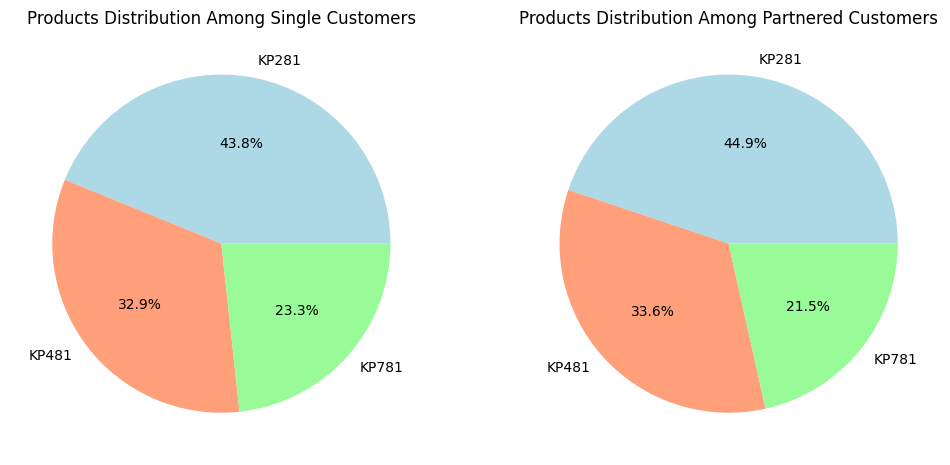

In [118]:
single_df = df[df['MaritalStatus'] == 'Single']
partnered_df = df[df['MaritalStatus'] == 'Partnered']
single_product_counts = single_df['Product'].value_counts(normalize=True) * 100
partnered_product_counts = partnered_df['Product'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(single_product_counts, labels=single_product_counts.index, autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Single Customers')

plt.subplot(1, 2, 2)
plt.pie(partnered_product_counts, labels=partnered_product_counts.index, autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Partnered Customers')

plt.show()


Insights :
• Among the married customers, the purchase distribution is : 44.9% prefer KP281, 33.6%
prefer KP481 and the remaining 21.7% prefer KP781.
• Among the single customers , the purchase distribution is : 43.8% prefer KP281, 32.9% prefer
KP481, and the remaining 23.3% prefer KP781.

**<h2> Distribution based on Age group across each Treadmill**

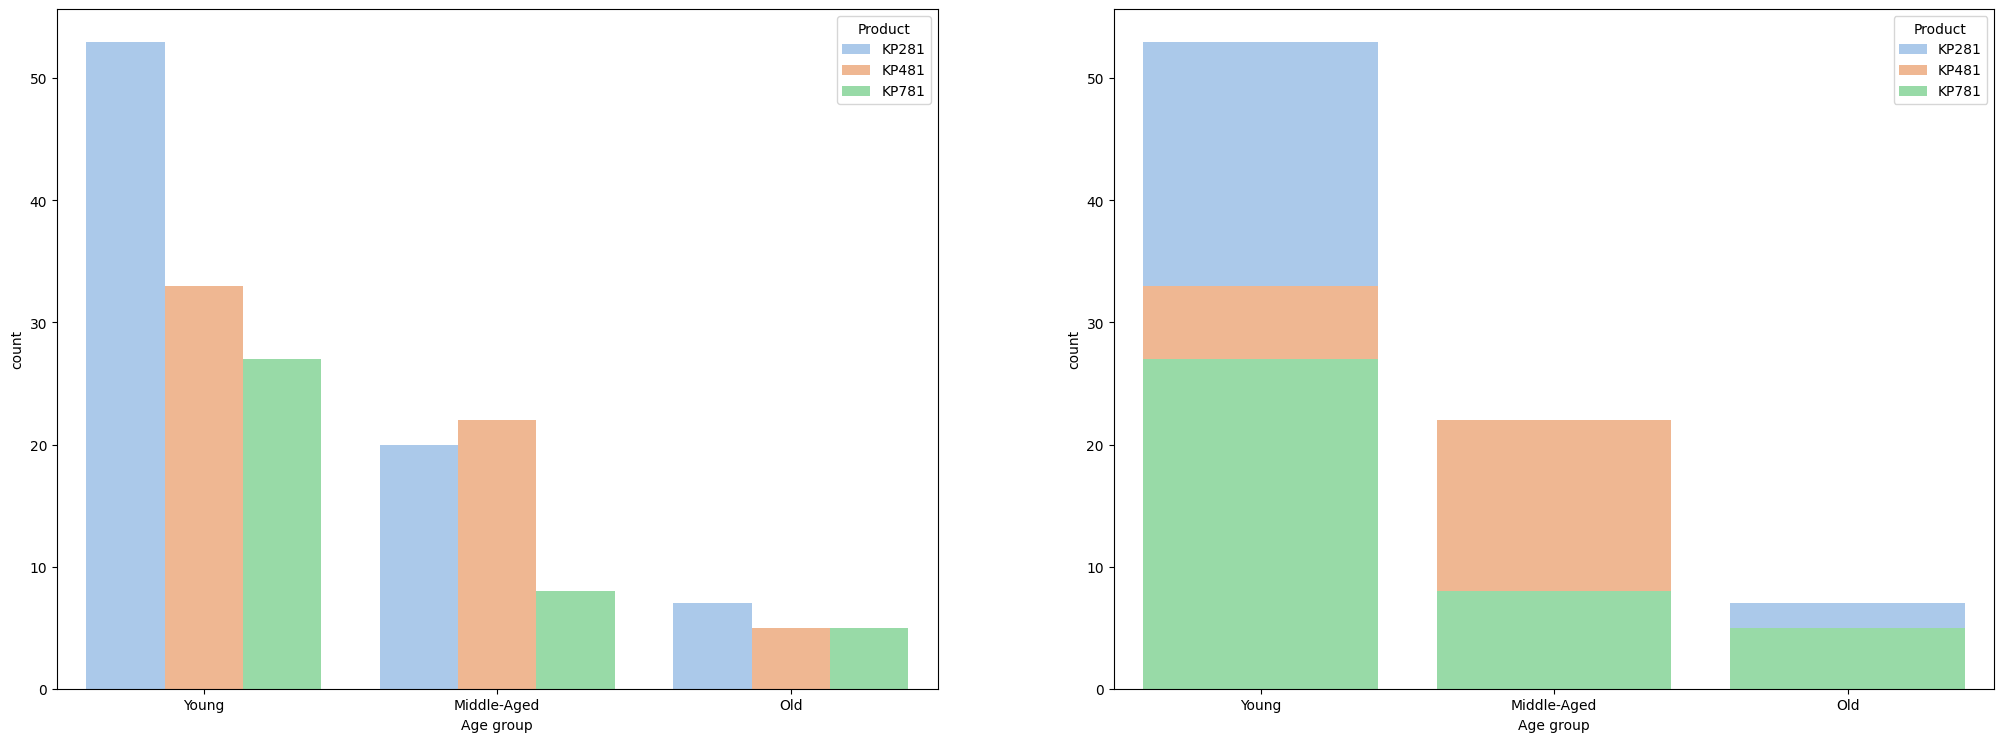

In [119]:
plt.figure(figsize=(25, 30))
# Subplot 1: Countplot for all Age groups with dodge
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Age group', hue='Product',palette='pastel')
# Subplot 2: Countplot for all Age groups without dodge
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='Age group', hue='Product',palette='pastel', dodge=False)
plt.show()

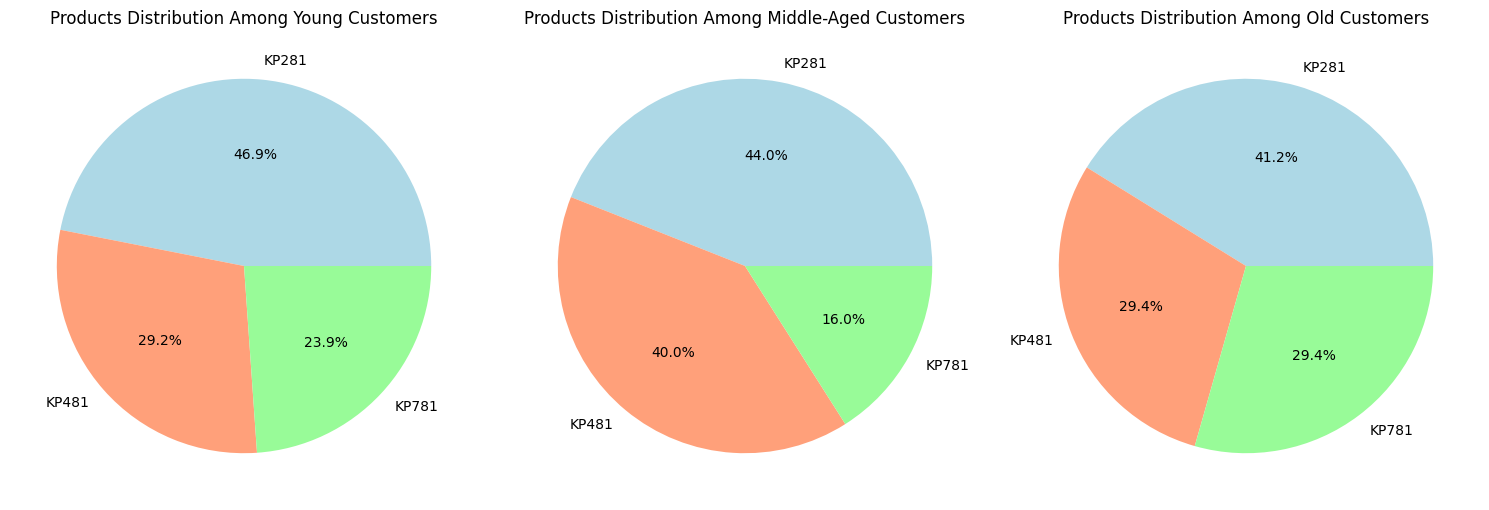

In [120]:
young_df = df[df['Age group'] == 'Young']
middle_aged_df = df[df['Age group'] == 'Middle-Aged']
old_df = df[df['Age group'] == 'Old']

pastel_palette = ['#ADD8E6', '#FFA07A', '#98FB98']

# Plot for young_df
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(young_df['Product'].value_counts(normalize=True)*100,
        labels=young_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Young Customers')

# Plot for middle_aged_df
plt.subplot(1, 3, 2)
plt.pie(middle_aged_df['Product'].value_counts(normalize=True)*100,
        labels=middle_aged_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Middle-Aged Customers')

# Plot for old_df
plt.subplot(1, 3, 3)
plt.pie(old_df['Product'].value_counts(normalize=True)*100,
        labels=old_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Old Customers')

plt.tight_layout()
plt.show()


Insights :

• Majority of the customer fall in the Young category .

• Majority of the middle-aged users chose KP281 as it is and entry level option.

• Among the young and old aged also KP281 is the preffered one.

**<h2> Distribution based on Income level across each Treadmill**

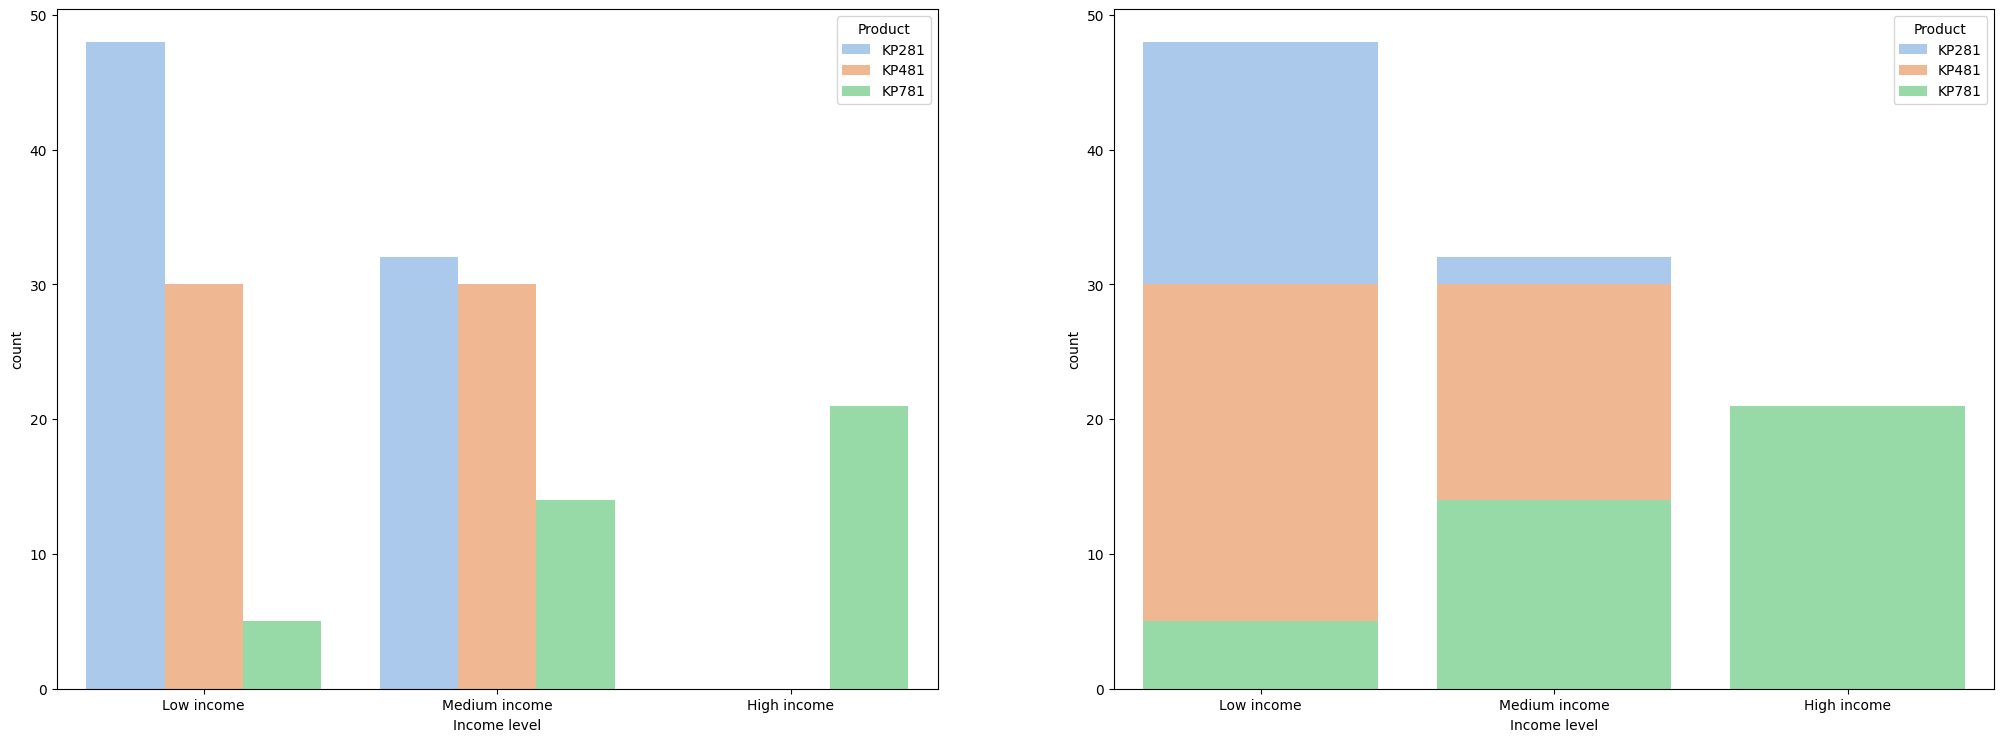

In [121]:
plt.figure(figsize=(25, 30))
# Subplot 1: Countplot for all Income levels with dodge
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Income level', hue='Product',palette='pastel')
# Subplot 2: Countplot for all Income levels without dodge
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='Income level', hue='Product',palette='pastel', dodge=False)
plt.show()

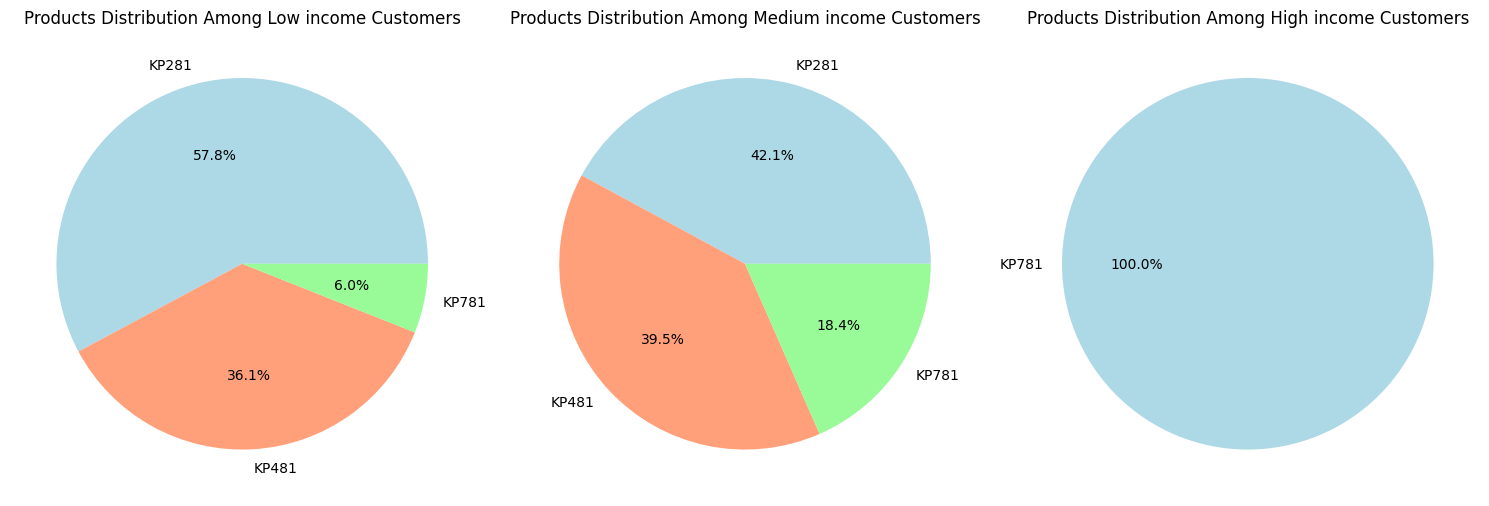

In [122]:
low_income_df = df[df['Income level'] == 'Low income']
medium_income_df = df[df['Income level'] == 'Medium income']
high_income_df = df[df['Income level'] == 'High income']

pastel_palette = ['#ADD8E6', '#FFA07A', '#98FB98']

# Plot for Low income_df
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(low_income_df['Product'].value_counts(normalize=True)*100,
        labels=low_income_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Low income Customers')

# Plot for medium_income_df
plt.subplot(1, 3, 2)
plt.pie(medium_income_df['Product'].value_counts(normalize=True)*100,
        labels=medium_income_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among Medium income Customers')

# Plot for high_income_df
plt.subplot(1, 3, 3)
plt.pie(high_income_df['Product'].value_counts(normalize=True)*100,
        labels=high_income_df['Product'].unique(), autopct='%1.1f%%', colors=pastel_palette)
plt.title('Products Distribution Among High income Customers')

plt.tight_layout()
plt.show()


Insights:

- Low-income customers constitute the largest segment of Aerofit product buyers.
- Among low-income individuals, the preference overwhelmingly leans towards KP281 due to its affordability. Remarkably, only a few customers opted for KP481, and none purchased KP781.
- Middle-income customers predominantly choose KP281, followed by KP481 and then KP781.
- High-income customers show a distinct preference for KP781, followed by KP481 and then KP281. The majority opt for KP781, possibly perceiving it as a premium option with superior features.

**<h2> Distribution based on Miles across each Treadmill**

<Axes: xlabel='Product', ylabel='Miles'>

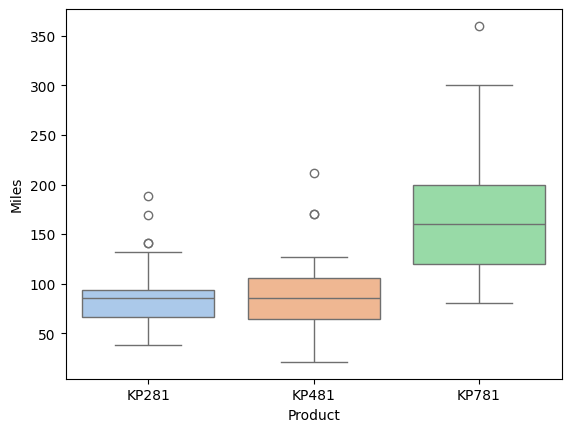

In [123]:
sns.boxplot(data=df, x='Product', y='Miles', hue='Product', palette='pastel', legend=False)

<Axes: xlabel='Product', ylabel='Miles'>

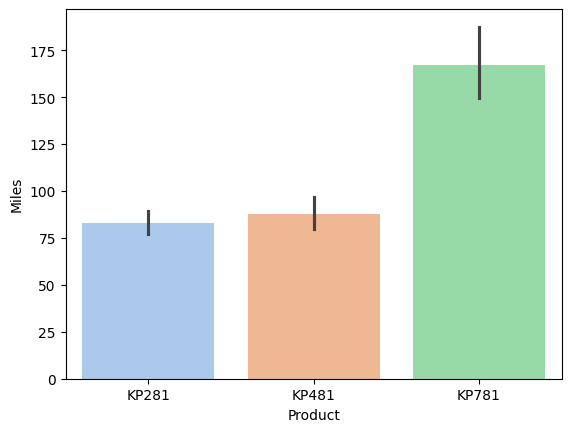

In [124]:
sns.barplot(data=df, x='Product', y='Miles', hue='Product', palette='pastel', legend=False)

Insights :

• Customers who run 60 - 100 miles per week preffered with KP281 treadmill, while the mid runners who run 60 - 120 miles per week preffered KP481 and the heavy runners who run
120 - 200 miles per week opt for KP781 treadmills.

**<h2> Distribution based on Education across each Treadmill**

<Axes: xlabel='Product', ylabel='Education'>

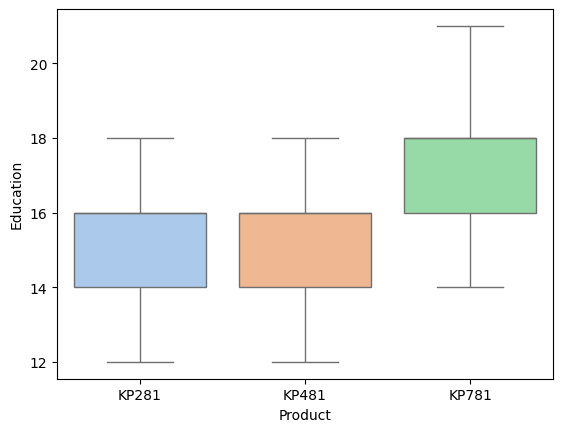

In [125]:
sns.boxplot(data=df, x='Product', y='Education', hue='Product', palette='pastel', legend=False)

<Axes: xlabel='Product', ylabel='Education'>

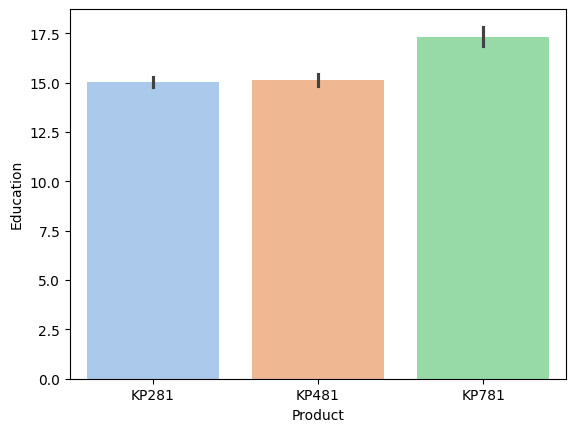

In [126]:
sns.barplot(data=df, x='Product', y='Education', hue='Product', palette='pastel', legend=False)

Insights:
- Customers with 14 to 16 years of education show a preference for both the KP281 and KP481 treadmills.
- Conversely, the KP781 treadmill is favored by the majority of customers with 16 to 18 years of education compared to other treadmill models.

**<h2> Distribution based on Usage across each Treadmill**

<Axes: xlabel='Product', ylabel='count'>

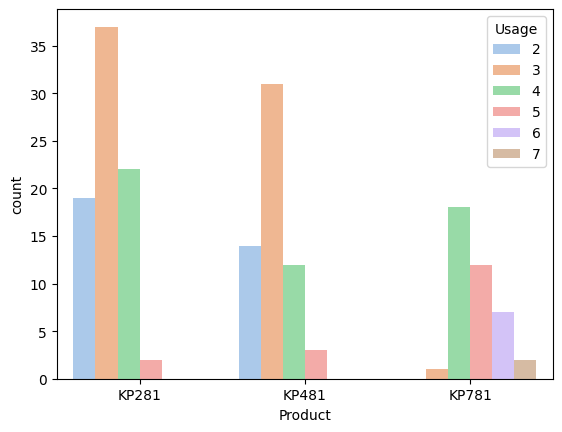

In [127]:
sns.countplot(df, x = 'Product', hue = 'Usage',palette = 'pastel')

Insights :

• Customers who use treadmills 3 times per week prefer both KP281 and KP481.

• However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.

**<h2> Distribution based on Fitness across each Treadmill**

<Axes: xlabel='Product', ylabel='count'>

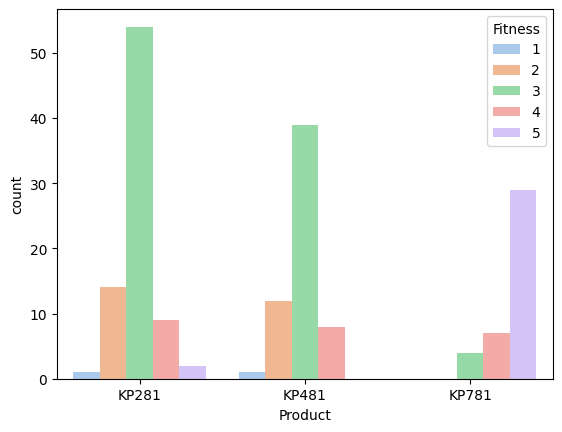

In [128]:
sns.countplot(df, x = 'Product', hue = 'Fitness',palette = 'pastel')

Insights :

• Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers
with fitness level 5 predominantly use the most advanced KP781 treadmill.

**<h1>Pairplots**

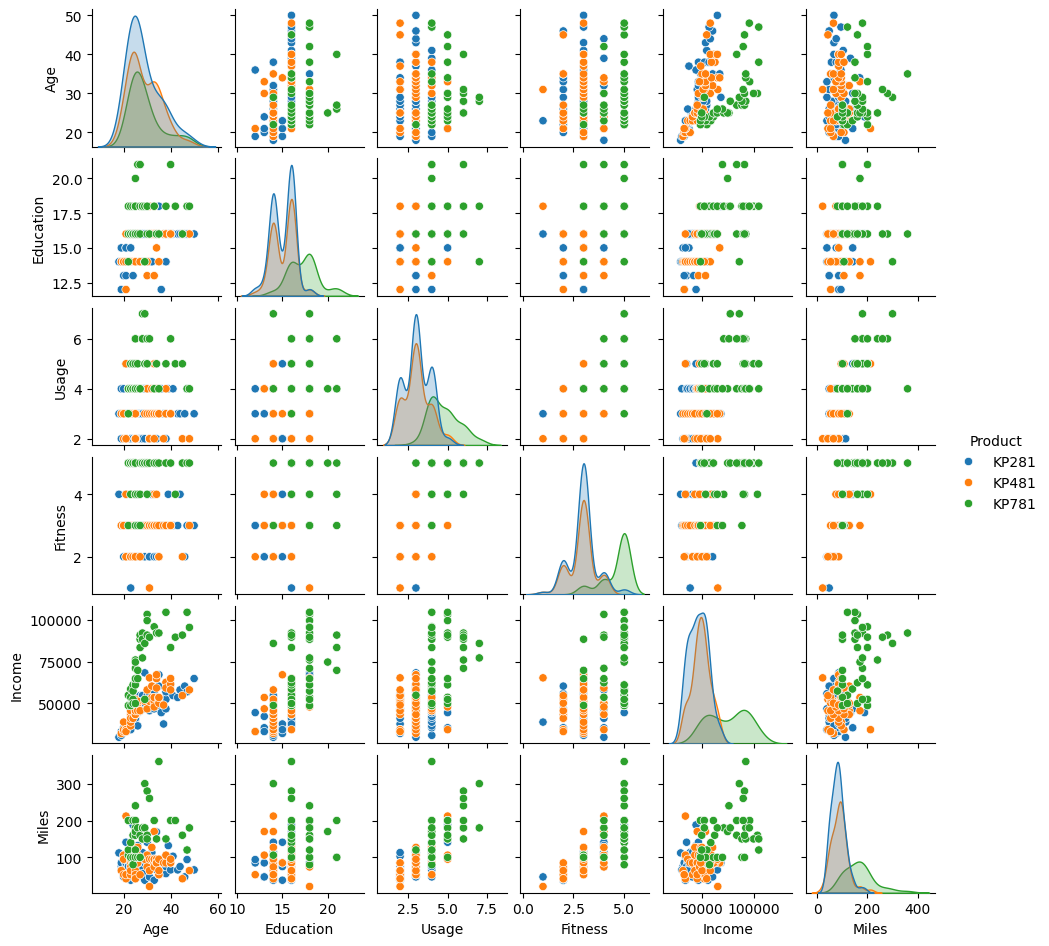

In [129]:
sns.pairplot(df, hue='Product', height=1.6)


<h2>Insights</h2>


*   Age and Income: A positive correlation exists between age and income group, implying that older customers typically belong to higher income brackets.

*   Income and Education: There is a tendency for customers with higher incomes to possess higher levels of education, indicating a positive relationship between income and education.


*   Usage Frequency and Fitness: Customers who use the treadmill more frequently are likely to exhibit higher levels of fitness, suggesting a connection between usage frequency and fitness levels.
*   Weekly Mileage and Fitness: A correlation is observed between the number of miles run per week and fitness levels, with customers covering greater distances tending to have higher fitness levels.


*   Marital Status and Product Preference: No discernible relationship is evident between marital status and product preference among customers.
*   Generation and Product Preference: Similarly, there is no clear association between generation and product preference among customers.







**<h1>Heatmaps**

<Axes: >

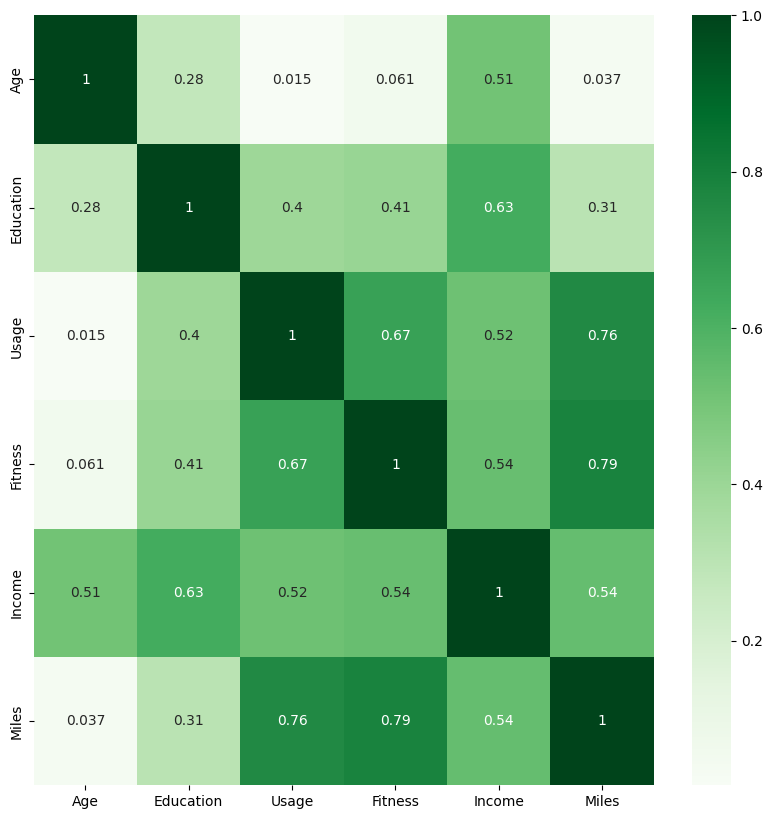

In [130]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), cmap='Greens', annot=True)

<h2>Analysis:</h2>

*   Age and Education: There is a clear association between age and educational attainment, as customers tend to achieve higher levels of education as they grow older.
*   Age and Income: A noticeable trend indicates that older customers generally enjoy higher incomes, suggesting a positive correlation between age and income.

*   Usage and Fitness: A significant correlation of 0.67 underscores the relationship between usage frequency and fitness levels, indicating that customers who plan to use the treadmill more frequently typically exhibit higher levels of fitness.
*   Age and Fitness: Although present, the correlation between age and fitness is relatively weak, with a coefficient of approximately 0.06.


*   Fitness and Miles: A strong correlation of around 0.79 emphasizes the connection between fitness levels and weekly mileage, indicating that individuals with higher fitness levels also anticipate covering more miles per week.














**<h1>Conditional and Marginal Probabilities</h2>**
**<h2>Impact of gender on purchasing the treadmill**

In [131]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, margins_name='Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


**Marginal Probabilities**

P(KP281) = 80 /180 = 0.44

P(KP481) = 60/180 = 0.33

P(KP781) = 40/180 = 0.22

P(MALE) = 104/180 = 0.58

P(FEMALE) = 76/180 = 0.42

**Conditional Probabilities**

P(KP281|Male) = 0.22

P(KP281|Female) = 0.22

P(KP481|Male) = 0.17

P(KP481|Female) = 0.16

P(KP781|Male)
= 0.18

P(KP781|Female) = 0.04

**<h2>Impact of marital status on purchasing the treadmill**

In [132]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, margins_name='Total')

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


**Marginal Probabilities**

P(KP281) = 80 /180 = 0.44

P(KP481) = 60/180 = 0.33

P(KP781) = 40/180 = 0.22

P(Single) = 73/180 = 0.40

P(Partnered) = 107/180 = 0.59

**Conditional Probabilities**

P(KP281|Single) = 0.18

P(KP281|Partnered) = 0.27

P(KP481|Single) = 0.13

P(KP481|Partnered) = 0.20

P(KP781|Single)= 0.09

P(KP781|Partnered) = 0.13

**<h2>Impact of Age group on purchasing the treadmill**

In [133]:
pd.crosstab(index = df['Product'],columns = df['Age group'],margins=True,margins_name='Total')

Age group,Young,Middle-Aged,Old,Total
Product,,,,
KP281,53,20,7,80
KP481,33,22,5,60
KP781,27,8,5,40
Total,113,50,17,180


**Marginal Probabilities**

P(KP281) = 80 /180 = 0.44

P(KP481) = 60/180 = 0.33

P(KP781) = 40/180 = 0.22

P(Young) = 113/180 = 0.62

P(Middle-Aged) = 50/180 = 0.27

P(Old) = 17/180 = 0.09

**Conditional Probabilities**

P(KP281|Young) = 0.29/0.62 = 0.47

P(KP281|Middle-Aged) = 0.11/0.27 = 0.41

P(KP281|Old) = 0.03/0.09 = 0.33

P(KP481|Young) = 0.18/0.62 = 0.29

P(KP481|Middle-Aged) = 0.12/0.27 = 0.45

P(KP481|Old) = 0.02/0.09 = 0.30

P(KP781|Young)= 0.15/0.62 = 0.24

P(KP781|Middle-Aged) = 0.04/0.27 = 0.16

P(KP781|Old) = 0.02/0.09 = 0.30

**<h2>Impact of Income on purchasing the treadmill**

In [134]:
pd.crosstab(index = df['Product'],columns = df['Income level'],margins=True,margins_name='Total')

Income level,Low income,Medium income,High income,Total
Product,,,,
KP281,48,32,0,80
KP481,30,30,0,60
KP781,5,14,21,40
Total,83,76,21,180


**Marginal Probabilities**

P(KP281) = 80 /180 = 0.44

P(KP481) = 60/180 = 0.33

P(KP781) = 40/180 = 0.22

P(Low) = 83/180 = 0.46

P(Medium) = 76/180 = 0.42

P(High) = 21/180 = 0.11

**Conditional Probabilities**

P(KP281|Low) = 0.26/0.46 = 0.57

P(KP281|Medium) = 0.17/0.42 = 0.42

P(KP281|High) = 0

P(KP481|Low) = 0.16/0.46 = 0.36

P(KP481|Medium) = 0.16/0.46 = 0.36

P(KP481|High) = 0

P(KP781|Low)= 0.02/0.46 = 0.04

P(KP781|Medium) = 0.07/0.42 = 0.18

P(KP781|High) = 0.11/0.11 = 1


**ADDITIONAL QUESTIONS ON CONDITIONAL PROBABILITY**

Q) What is the probability that a customer purchased a particular Trademill(KP281,KP481,KP781) and they run approximately 80 miles per week?

In [135]:
total_length = len(df)
products = ['KP281', 'KP481', 'KP781']
miles = 80
probabilities = {}

for product in products:
    total_miles = len(df.loc[df['Miles'] == miles])
    total_product_miles = len(df.loc[(df['Product'] == product) & (df['Miles'] == miles)])
    conditional_probability = total_product_miles / total_miles
    probabilities[product] = conditional_probability

for product, probability in probabilities.items():
    print(f'Probability of a customer purchasing a {product} given that they run {miles} miles per week: {probability}')


Probability of a customer purchasing a KP281 given that they run 80 miles per week: 0.0
Probability of a customer purchasing a KP481 given that they run 80 miles per week: 0.0
Probability of a customer purchasing a KP781 given that they run 80 miles per week: 1.0


**<h1>Customer Profiling**

**<h2>Identifying Potential Buyers for the KP281 Treadmill</h2>**

1. **Gender**: Both males and females are potential buyers.
2. **Marital Status**: Both partnered and single individuals are included.
3. **Age**: Targeting the age range of 18-29, as the likelihood of older customers purchasing the KP281 is minimal.
4. **Income**: Focusing on customers with an income range of $29,000 to $50,000 USD, as the probability of high-income individuals purchasing the KP281 treadmill is negligible.
5. **Education**: Targeting individuals with 14-16 years of education.
6. **Fitness Level**: Customers with a fitness level of 3 are considered potential buyers.
7. **Usage**: Targeting customers who use the treadmill at least 3 times a week.
8. **Miles**: Customers who run approximately 60-100 miles per week are within the target demographic for the KP281 treadmill.

**<h2>Identifying Potential Buyers for the KP481 Treadmill**

1. **Gender**: Both males and females are potential buyers.
2. **Marital Status**: Both partnered and single individuals are included.
3. **Age**: Targeting the age range of 18-39 years.
4. **Income**: Focusing on customers with an income range of $29,000 to $75,000 USD, as the likelihood of high-income individuals purchasing the KP481 treadmill is minimal.
5. **Education**: Targeting individuals with 14-16 years of education.
6. **Fitness Level**: Customers with a fitness level of 3 are considered potential buyers.
7. **Usage**: Targeting customers who use the treadmill at least 3 times a week.
8. **Miles**: Customers who run approximately 80-120 miles per week, mostly categorized as mid-runners, are within the target demographic for the KP481 treadmill.

**<h2>Identifying Potential Buyers for the KP781 Treadmill</h2>**

1. **Gender**: Primarily targeting male customers, as the likelihood of female customers purchasing the KP781 is significantly low.
2. **Marital Status**: Focusing on married customers, as the probability of single individuals purchasing the KP781 is also minimal.
3. **Age**: Targeting individuals aged 18-39 years.
4. **Income**: Targeting customers with an income range of $75,000 to $105,000 USD, as the probability of customers from lower and middle-income brackets purchasing the KP781 treadmill is very low.
5. **Education**: Targeting individuals with 16-18 years of education.
6. **Fitness Level**: Customers with a fitness level of 5 are considered potential buyers.
7. **Usage**: Targeting customers who use the treadmill at least 3 times a week.
8. **Miles**: Customers who run approximately 120-200 miles per week, mostly consisting of hardcore runners, are within the target demographic for the KP781 treadmill.

**<h2>Insights **

1. KP281 emerges as the preferred choice for both male and female customers.
2. Female customers exhibit a slightly higher inclination towards KP481 compared to male customers.
3. KP781 shows lower popularity among customers of both genders, indicating room for improvement in its appeal or targeted marketing.
4. Married customers demonstrate a higher purchasing frequency across all treadmill models compared to single customers.
5. The majority of customers fall within the mid-aged category (20-40 years), with KP281 being their preferred entry-level option.
6. KP281 remains the preferred choice among young and elderly customers as well.
7. Customers in income category 2 represent the largest segment purchasing Aerofit products.
8. Low-income customers prefer KP281 due to its affordability.
9. Middle-income customers show a preference for KP281, followed by KP481 and KP781.
10. High-income customers exhibit a preference for KP781, followed by KP481 and KP281.
11. Treadmill preference correlates with running frequency: KP281 for 60-100 miles, KP481 for 60-120 miles, and KP781 for 120-200 miles per week.
12. Customers with 14-16 years of education prefer KP281 and KP481, while those with 16-18 years prefer KP781.
13. Customers using treadmills 3 times per week favor KP281 and KP481, while those using 4-5 times lean towards KP781.
14. Fitness level influences treadmill preference: level 3 customers prefer KP281 and KP481, while level 5 customers opt for KP781.
15. Positive correlation exists between age and income, with higher income associated with higher education levels.
16. Frequent treadmill usage correlates with higher fitness levels and weekly mileage.
17. No clear relationship observed between marital status or generation and treadmill preference.
18. Age positively correlates with education and income, with a moderate correlation observed between age and income.
19. Strong correlation observed between usage frequency and fitness levels.
20. Strong positive correlation found between fitness levels and weekly mileage.

Additionally:

- Probability of purchasing KP281 given 80 miles/week is 0.2857.
- Probability of purchasing KP481 given 80 miles/week is 0.1429.
- Probability of purchasing KP781 given 80 miles/week is 1.0.

**<h2>Recommendations</h2>**

1. **Customize Marketing for Female Customers**: Tailor marketing messages to appeal specifically to female customers, highlighting the unique benefits and features of the KP481 treadmill model that resonate with their preferences and lifestyle.

2. **Offer Incentives for Married Couples**: Introduce targeted promotional offers or exclusive discounts aimed at encouraging married couples to invest in treadmills, leveraging their higher purchasing frequency as a potential market segment.

3. **Promote Entry-Level Option KP281**: Emphasize the affordability and accessibility of the KP281 treadmill to attract customers across various income brackets, positioning it as an ideal entry-level option for those looking to kickstart their fitness journey.

4. **Target Mid-Aged Customers**: Focus marketing efforts on the 20-40 age demographic, which comprises a significant portion of the customer base and demonstrates consistent purchasing behavior, thereby maximizing marketing ROI.

5. **Target High-Income Customers**: Develop strategic initiatives to appeal to customers with higher disposable incomes, capitalizing on their preference for premium products such as the advanced KP781 treadmill model.

6. **Provide Flexible Financing Options**: Enhance affordability and accessibility by offering flexible financing solutions, making Aerofit treadmills more attainable for customers with lower incomes while minimizing financial barriers to purchase.

7. **Promote Treadmills for Runners**: Showcase the durability and performance features of Aerofit treadmills tailored for runners, positioning them as indispensable tools for achieving running goals and enhancing overall fitness levels.

8. **Educate Customers about Exercise Benefits**: Develop educational content that highlights the numerous health benefits of regular exercise and how Aerofit treadmills can facilitate achieving fitness goals, empowering customers to make informed purchasing decisions.

9. **Optimize Online Presence**: Enhance the online customer experience by optimizing the Aerofit website and social media channels to provide comprehensive product information, customer reviews, and seamless purchasing options.

10. **Collaborate with Fitness Influencers**: Forge partnerships with influential figures in the fitness community to endorse Aerofit treadmills, leveraging their credibility and audience reach to amplify brand visibility and credibility.

11. **Offer Trial Periods or Demos**: Instill confidence in potential customers by offering trial periods or demo opportunities to experience Aerofit treadmills firsthand, facilitating informed decision-making and reducing purchase hesitation.

12. **Host Fitness Events or Challenges**: Foster community engagement and brand loyalty by organizing fitness events or challenges centered around Aerofit treadmills, creating opportunities for customers to connect and share their experiences.

13. **Prioritize Excellent Customer Service**: Provide exceptional customer service throughout the entire customer journey, from pre-sales inquiries to post-purchase support, to ensure a seamless and positive experience for all customers.

14. **Collect and Analyze Customer Feedback**: Gather valuable insights from customer feedback to continuously improve products and services, addressing any pain points or areas for enhancement to better meet customer expectations.

15. **Stay Informed on Market Trends**: Stay abreast of industry trends, competitor activities, and evolving customer preferences to remain agile and responsive in adapting marketing strategies and product offerings accordingly.

16. **Invest in Research and Development**: Allocate resources towards ongoing research and development efforts to innovate and introduce new features and models that align with evolving customer needs and market demands.

17. **Diversify Product Offerings**: Expand the product portfolio to include accessories or complementary products that enhance the overall customer experience and cater to a broader range of fitness enthusiasts.

18. **Cultivate Brand Loyalty**: Implement customer loyalty programs or referral incentives to incentivize repeat purchases and foster brand advocacy, thereby strengthening customer relationships and driving long-term brand loyalty.
